### KWAKYE GEORGE


# Reservoir simulation 1D explicit solution

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [9]:
#rock and fluid properties
L    = 1000                 #length of reservior ft
phi  = 0.2                  #porosity
k    = 50                   #permeability mD
ct   = 1E-6                 #compressibility psi-1
visc = 1.0                  #viscosity cp
alpha = k/(phi*ct*visc)    #diffusivity constant 

#Boundary conditions/initial conditions
Pi  = 1000     #intial reservior pressure
Pb  = 2000     #boundary condition at x =0
q   = 0        #boundary condition at x = l 


#numerical properties 
N  = 11                                      #number of grid blocks
dx =L/N                                      #dimension of grid blocks
x   = np.linspace(dx/2,L-dx/2,N)            #Create center of grid blocks

dt =0.002                                    #time step(days)
t_final = 2                                  #simulation time(days)
t   = np.arange(0,t_final,dt)         


P   =np.ones(N)*Pi                           #intialize pressure in all gridblocks
eta = 0.00633*alpha*dt/(dx**2)               #dimensionless constant
a   = eta
b   =(1-2*eta)
c   =eta
print(eta)

0.382965


In [10]:
#create pressure P(n+1,i) array
P_r = np.zeros((len(t),N))
P_r[0] = P                  #set gridblocks pressures at time 0 to initial pressure

In [11]:
#calculate P(n+1,i) 

for j in range(1,len(t)): 
    
    for i in range(1,len(P)-1):
        P_r[j,i] = a*P_r[j-1,i-1] +b*P_r[j-1,i]+c*P_r[j-1,i+1]
    
    P_r[j,0]= 2*eta*Pb + (1-3*eta)*P_r[j-1,0]+c*P_r[j-1,1]
    P_r[j,-1]=eta*P_r[j-1,-2]+(1-eta)*P_r[j-1,-1]
    
    
P_response = pd.DataFrame(P_r,columns =x.round())
P_response.head(5)

,45.0,136.0,227.0,318.0,409.0,500.0,591.0,682.0,773.0,864.0,955.0
0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
1,1765.930000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
2,1651.886853,1293.324382,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
3,1781.200279,1318.308287,1112.332972,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
4,1771.514117,1416.698382,1148.194712,1043.019597,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0


In [12]:
P_response['Time(days)'] = t
P_response = P_response.set_index('Time(days)')

In [13]:
P_T =P_response.T

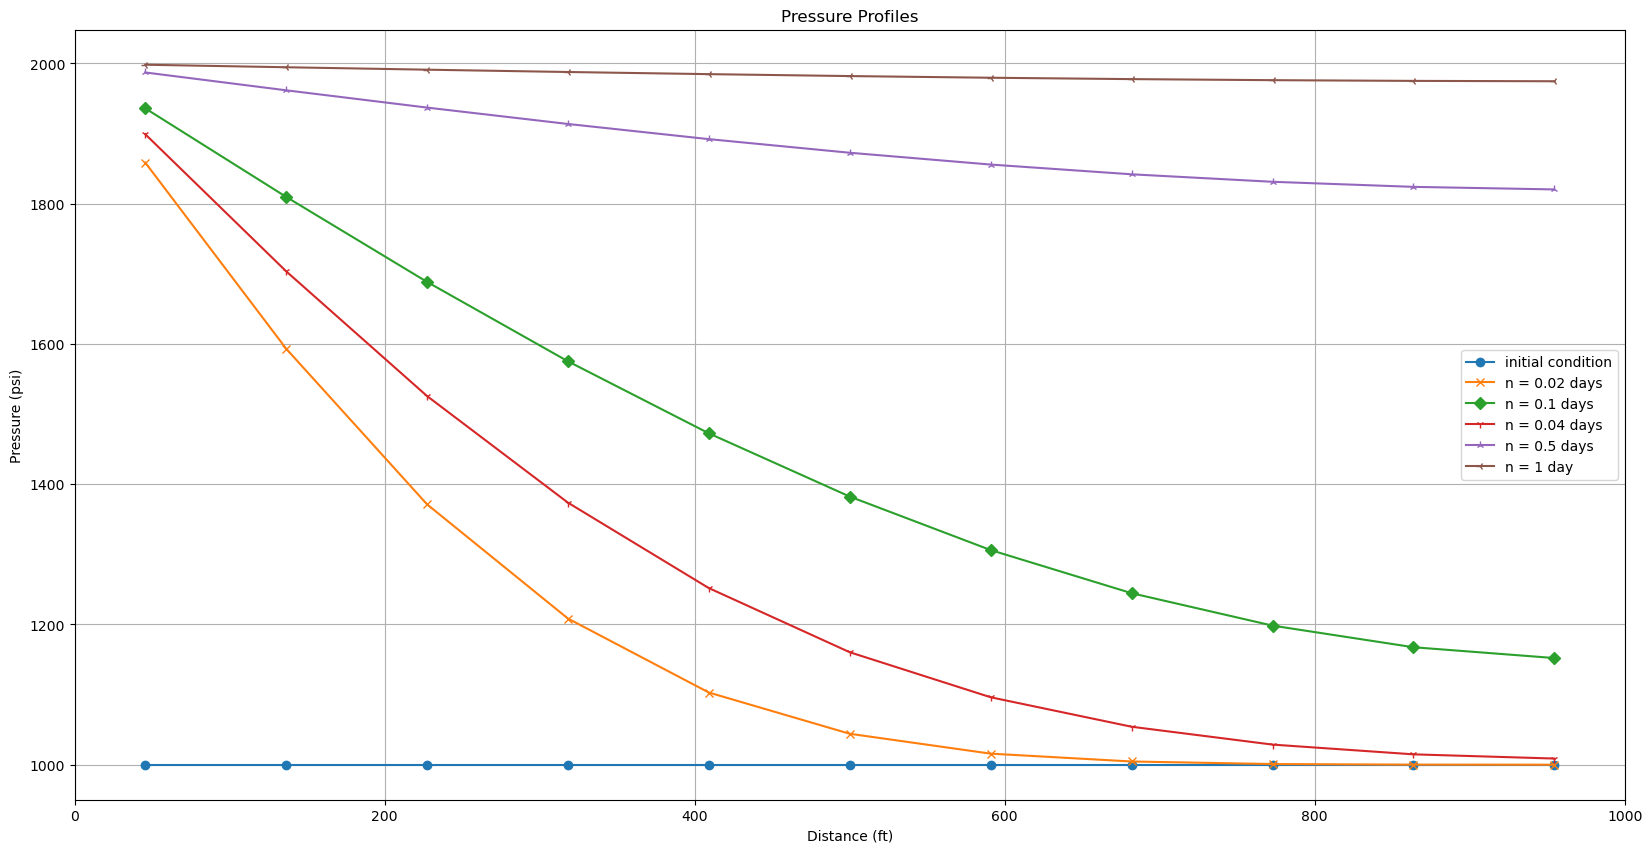

In [14]:
plt.style.use('default')
plt.figure(figsize =(20,10))

plt.plot(x,P_T[0],    label  = 'initial condition',marker ='o')
plt.plot(x,P_T[0.02], label  = 'n = 0.02 days',marker ='x')
plt.plot(x,P_T[0.1],  label  = 'n = 0.1 days',marker ='D')
plt.plot(x,P_T[0.04], label  = 'n = 0.04 days',marker ='1')
plt.plot(x,P_T[0.5],  label  = 'n = 0.5 days',marker ='2')
plt.plot(x,P_T[1],    label  = 'n = 1 day',marker ='3')


plt.xlabel('Distance (ft)')
plt.ylabel('Pressure (psi)')
plt.title('Pressure Profiles')


plt.legend(loc='best')
plt.grid()